In [36]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import random
import re

In [37]:
# Set the directory containing your CSV files
raw_directory_path = '../data/raw/'

csv_files = glob.glob(os.path.join(raw_directory_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files.")

Found 13 CSV files.


In [38]:
processed_directory_path = '../data/processed/'
illuminate = pd.read_csv(os.path.join(processed_directory_path, "IlluminateCombined.csv"), low_memory=False)

In [39]:
display(illuminate.head())

,schoolyearnumberspring,unitnumber,Mask_StudentPersonkey,title,AssessmentId,responsedatevalue,DateValue,Response_points,Response_points_possible,Response_percent_correct,...,Standard_percent_correct,condition,pointsvarchar,categorytitle,stdgrouping,SchoolId,GradeLevelDuringUnitTest,ContinuousAchievementLevel,AssessmentGradeLevel,CurrentSchoolDetailFCSID
0,2022,1,763538,Math,187897,2021-09-19 00:00:00,2021-09-19 00:00:00,5.0,15.0,33.33,...,14.29,Reteach,1/7,Grade 3,MGSE3.NBT.1 Use place value understanding to r...,29,03,On Level,03,492
1,2022,6,862425,Language Arts,232138,2022-05-11 00:00:00,2022-05-11 00:00:00,6.0,8.0,75.00,...,100.00,Extension,1/1,Grades: 6-8,ELAGSE6RI6_3.0_2 ELAGSE6RI6_3.0_2 Determine an...,37,06,On Level,06,696
2,2022,4,582651,Math,191184,2022-01-28 00:00:00,2022-01-28 00:00:00,16.0,17.0,94.12,...,100.00,Extension,2/2,Mathematical Practices,4 Model with mathematics.,108,03,On Level,03,615
3,2022,2,584570,Language Arts,195554,2021-10-29 00:00:00,2021-10-29 00:00:00,7.0,10.0,70.00,...,100.00,Extension,1/1,Grade 4,ELAGSE4RI2_3.0_3 ELAGSE4RI2_3.0_3 Summarize th...,17,04,On Level,04,120
4,2022,6,550130,Math,227708,2022-02-23 00:00:00,2022-02-23 00:00:00,13.0,15.0,86.67,...,100.00,Extension,2/2,Grade 8,MGSE8.F.5 Describe qualitatively the functiona...,64,07,Accelerated,08,686


In [40]:
eda_files = [
    "Georgia Milestones Scores.csv",
    "Georgia Milestones Sublevel Score.csv",
    "StudentTeacherGradeCombined",
    "GraduationAreaSummary.csv",
    "Courses.csv"
]

for fname in eda_files:
    fpath = os.path.join(raw_directory_path, fname)
    try:
        try:
            df = pd.read_csv(fpath, encoding="utf-8", low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(fpath, encoding="latin1", low_memory=False)

        print(f"\n📊 First 5 rows of {fname}:")
        display(df.head(5))

    except FileNotFoundError:
        print(f"File not found: {fname}")
    except Exception as e:
        print(f"Failed to load {fname}: {e}")


📊 First 5 rows of Georgia Milestones Scores.csv:


,GeorgiaMilestonesId,GeorgiaMilestonesAchievementLevelId,SubjectDesc,SchoolYearId,AssessmentAdministrationWindowId,AssessmentAdministrationWindowDesc,TestingDateId,StudentPersonKey_mask,SchoolDetailFCSId,SchoolId,...,ActiveFactGeorgiaMilestonesRecordFlag,ExtendedWritingT1Score,ExtendedWritingT2Score,NarrativeWritingResponse,ExtendedWritingPromptGenre,StudentGrowthPercentileFinal,StudentGrowthLevel,Assmnt_Sci,NRTNP_Range,Retest_Flag
0,1362898,1,Algebra I,32,5,Fall MM,11319,356119,804,143,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362899,2,American Literature & Composition,32,5,Fall MM,11319,217864,852,78,...,Y,3.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1362900,4,American Literature & Composition,32,5,Fall MM,11319,237883,852,78,...,Y,2.0,2.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
3,1362901,2,Algebra I,32,5,Fall MM,11319,236191,852,78,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1362902,1,Biology,32,5,Fall MM,11319,196546,852,78,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📊 First 5 rows of Georgia Milestones Sublevel Score.csv:


,GeorgiaMilestonesSublevelId,GeorgiaMilestonesId,SchoolId,SchoolDetailFCSId,StudentPersonKey_mask,AssessmentId,TestingDateId,AssessmentAdministrationWindowId,SchoolYearId,GeorgiaMilestonesMasteryLevelId,MasteryCategoryDomainScore,ActiveFactGeorgiaMilestonesSublevelRecordFlag
0,4700514,1362898,143,804,356119,767,11319,5,32,1,1,Y
1,4700515,1362898,143,804,356119,1070,11319,5,32,1,1,Y
2,4700516,1362898,143,804,356119,1071,11319,5,32,1,1,Y
3,4700517,1362898,143,804,356119,1072,11319,5,32,1,1,Y
4,4700518,1362899,78,852,217864,569,11319,5,32,1,1,Y


File not found: StudentTeacherGradeCombined

📊 First 5 rows of GraduationAreaSummary.csv:


,mask_studentpersonkey,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded
0,350335,741,115,2023,Math,4,1.5,2.5
1,1946451,870,80,2022,Health/ PersonalFitness,1,0.5,0.5
2,1987664,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0
3,1521002,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5
4,317341,751,74,2021,Social Studies,3,2.5,0.5



📊 First 5 rows of Courses.csv:


,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc
0,Unknown,-1,Unknown,Un,Unkwn,Unknown,Unknown,NaN,NaN,CC,NaN,NaN,-1,Unknown
1,17.0110400,7799,College Health,HS,HLTH,HEALTH EDUCATION,HEALTH,17.01100,Y,CC,DUAL,Dual Enrollment,0,Level 2 Honors
2,27.0610660,8107,TR Resrch Meth M H,HS,MATH,MATH,ELECTIVE,NaN,NaN,TR,NaN,NaN,0,Level 2 Honors
3,27.0610661,8108,TR Resrch Meth M H,HS,MATH,MATH,ELECTIVE,NaN,NaN,TR,NaN,NaN,0,Level 2 Honors
4,00.0011040,8843,Advisement 10-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors


In [41]:
# GraduationAreaSummary.csv
grad_summary = pd.read_csv(os.path.join(raw_directory_path, "GraduationAreaSummary.csv"), low_memory=False)

# Courses.csv (static course catalog)
courses = pd.read_csv(os.path.join(raw_directory_path, "Courses.csv"), low_memory=False)

all_grades = pd.read_csv(os.path.join(processed_directory_path, "StudentTeacherGradeCombined.csv"), low_memory=False)
def categorize_grade_level(grade):
    if grade in ['K', '01', '02', '03', '04', '05']:
        return 'Elementary'
    elif grade in ['06', '07', '08']:
        return 'Middle'
    elif grade in ['09', '10', '11', '12']:
        return 'High'
    else:
        return 'Unknown'

all_grades['SchoolLevel'] = all_grades['GradeLevel'].apply(categorize_grade_level)

display(all_grades.head())

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,mask_studentpersonkey,SchoolLevel
0,01,32,2021-2022,Q2,2021-10-13 00:00:00.000,2021-12-17 00:00:00.000,380.0,193.0,Level 1,00.0001110,...,5,Odyssey,0.0,0.0,S18,Semester,NaN,14906.0,418681.0,Elementary
1,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,155.0,298.0,Level 1,00.8000000,...,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,-1.0,419430.0,Elementary
2,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,601.0,101.0,Level 1,00.8000000,...,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,65356.0,433229.0,Elementary
3,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,324.0,5060.0,Level 1,00.8000000,...,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,29922.0,419002.0,Elementary
4,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,380.0,193.0,Level 1,00.0001110,...,5,Odyssey,0.0,0.0,S18,Semester,NaN,14906.0,466709.0,Elementary


In [42]:
all_grades = all_grades.rename(columns={"mask_studentpersonkey": "student_id"})

In [43]:
# Filter only High School students with credit data
hs_grades = all_grades[
    (all_grades["SchoolLevel"] == "High") &
    (all_grades["AttemptedCredit"].notna()) &
    (all_grades["EarnedCredit"] > 0)
]
display(hs_grades.sort_values(by="AttemptedCredit", ascending=False).head(5))

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,student_id,SchoolLevel
3797578,12,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,870.0,291.0,NaN,45.7216001,...,3,WBL - Social Studies,1.5,1.5,S18,Semester,100,-1.0,247423.0,High
3789685,12,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,870.0,291.0,NaN,26.7126001,...,3,WBL - Life Science,1.5,1.5,S18,Semester,95,24568.0,256742.0,High
6014146,11,34,2023-2024,S1,2023-08-07 00:00:00.000,2023-12-15 00:00:00.000,982.0,118.0,NaN,06.7116101,...,4,WBL - Entrepreneurship,1.5,1.5,S18,Semester,100,70017013.0,314419.0,High
6014148,11,34,2023-2024,S2,2024-01-03 00:00:00.000,2024-05-23 00:00:00.000,982.0,118.0,NaN,06.7126102,...,4,WBL - Entrepreneurship,1.5,1.5,S18,Semester,100,70017013.0,314419.0,High
6018035,12,34,2023-2024,S1,2023-08-07 00:00:00.000,2023-12-15 00:00:00.000,753.0,1323.0,NaN,21.7116101,...,8th,WBL - Engineering,1.5,1.5,S18,Semester,79,114329.0,356332.0,High


In [44]:
# Make cleaned copies before modifying
hs_grades_cleaned = hs_grades.copy()
grad_summary_cleaned = grad_summary.copy()
hs_grades_cleaned.loc[:, "student_id"] = hs_grades_cleaned["student_id"].astype(str).str.replace(r"\.0$", "", regex=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_26272\2910864423.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['370673' '311666' '329248' ... '361715' '361715' '361715']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hs_grades_cleaned.loc[:, "student_id"] = hs_grades_cleaned["student_id"].astype(str).str.replace(r"\.0$", "", regex=True)


In [45]:
# Rename and normalize student ID in the graduation summary
grad_summary_cleaned['student_id'] = grad_summary_cleaned['mask_studentpersonkey'].astype(str)
grad_summary_cleaned['student_id'] = grad_summary_cleaned['student_id'].str.replace(r"\\.0$", "", regex=True)
grad_summary_cleaned = grad_summary_cleaned.drop(columns=["mask_studentpersonkey"])


# Normalize student ID in the grades data
# The column is already named 'student_id'
hs_grades_cleaned['student_id'] = hs_grades_cleaned['student_id'].astype(str)
hs_grades_cleaned['student_id'] = hs_grades_cleaned['student_id'].str.replace(r"\\.0$", "", regex=True)


print("✅ Student IDs have been cleaned and normalized in both DataFrames.")
display(grad_summary_cleaned.head(2))
display(hs_grades_cleaned.head(2))

✅ Student IDs have been cleaned and normalized in both DataFrames.


,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451


,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,student_id,SchoolLevel
3326453,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,1,10th Lit/Comp H,0.5,0.5,S18,Semester,100,7186.0,370673,High
3326455,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,6,Phys Sci H,0.5,0.5,S18,Semester,99,110809.0,311666,High


In [46]:
### Using Graduate Area Summary as primary dataset since we focus on Graduation Recommendation ###

summary_ids = set(grad_summary_cleaned["student_id"])

# Get student IDs with course records in 2024-2025
active_2024_ids = set(
    hs_grades_cleaned[hs_grades_cleaned["SchoolYear"] == "2024-2025"]["student_id"]
)

# Find which summary students are active this year
active_summary_students = summary_ids & active_2024_ids
inactive_summary_students = summary_ids - active_2024_ids

# Report
print(f"📘 Students in summary: {len(summary_ids)}")
print(f"✅ Still active in 2024–2025: {len(active_summary_students)}")
print(f"❌ No activity in 2024–2025: {len(inactive_summary_students)}")

# Show a few inactive IDs
if inactive_summary_students:
    print("Sample of inactive students:")
    display(list(inactive_summary_students)[:5])

📘 Students in summary: 29316
✅ Still active in 2024–2025: 28442
❌ No activity in 2024–2025: 874
Sample of inactive students:


['2001805', '313747', '2000998', '2003649', '413205']

In [47]:
# Keep only active students in 2024–2025 for recommendations
grad_summary_filtered = grad_summary_cleaned[
    grad_summary_cleaned["student_id"].isin(active_2024_ids)
]

display(grad_summary_filtered.head())
print(len(grad_summary_filtered))

,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451
2,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0,1987664
3,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5,1521002
4,751,74,2021,Social Studies,3,2.5,0.5,317341


192326


In [48]:
# Join grad summary with hs_grades
merged = grad_summary_filtered.merge(
    hs_grades_cleaned,
    on="student_id",
    how="left"
)

#  Keep relevant columns
credit_data = merged[["student_id", "SubjectArea", "AreaCreditStillNeeded"]].drop_duplicates()

# Pivot to get SubjectArea as columns and values as AreaCreditStillNeeded
credit_pivot = credit_data.pivot_table(
    index="student_id",
    columns="SubjectArea",
    values="AreaCreditStillNeeded",
    aggfunc="last"
).fillna(0)

# Clean column names
credit_pivot.columns = [f"CredStill_{col}" for col in credit_pivot.columns]
credit_pivot.reset_index(inplace=True)

# Merge back with hs_grades_cleaned to enrich further
final_df = hs_grades_cleaned.merge(credit_pivot, on="student_id", how="left")

# Preview
display(final_df.head())

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
0,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,7186.0,370673,High,2.0,1.0,0.5,1.5,1.5,1.0,0.0
1,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,311666,High,1.5,1.5,0.5,1.5,1.5,1.5,0.0
2,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,741.0,910.0,Level 2 Honors,23.0620041,...,3931.0,329248,High,1.5,3.0,0.5,0.0,0.0,0.5,0.0
3,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,354631,High,1.5,1.5,0.0,1.5,1.0,1.5,0.0
4,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,866.0,198.0,Level 2 Honors,23.0620041,...,111252.0,331279,High,1.5,2.0,0.5,1.5,1.5,1.0,0.0


In [49]:
display(courses.head())

,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc
0,Unknown,-1,Unknown,Un,Unkwn,Unknown,Unknown,NaN,NaN,CC,NaN,NaN,-1,Unknown
1,17.0110400,7799,College Health,HS,HLTH,HEALTH EDUCATION,HEALTH,17.01100,Y,CC,DUAL,Dual Enrollment,0,Level 2 Honors
2,27.0610660,8107,TR Resrch Meth M H,HS,MATH,MATH,ELECTIVE,NaN,NaN,TR,NaN,NaN,0,Level 2 Honors
3,27.0610661,8108,TR Resrch Meth M H,HS,MATH,MATH,ELECTIVE,NaN,NaN,TR,NaN,NaN,0,Level 2 Honors
4,00.0011040,8843,Advisement 10-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors


In [50]:
# Strip and view distinct values
courses["Active_status_clean"] = courses["Active_status"].where(
    courses["Active_status"].notna()
).str.strip().str.upper()
print("Unique cleaned Active_status values:")
display(courses["Active_status_clean"].unique())

Unique cleaned Active_status values:


array([nan, 'Y', 'N'], dtype=object)

In [51]:
# Get frequency of cleaned status values
print(courses["Active_status_clean"].value_counts(dropna=False))

Active_status_clean
NaN    11564
Y       9522
N       1288
Name: count, dtype: int64


In [52]:
# Taking only active and high school level courses
courses_active = courses[
    (courses["Active_status_clean"] == "Y") & (courses["schooldetaillevelcode"] == "HS")
]

final_df.to_csv(os.path.join(processed_directory_path, "Final_DF.csv")  , index=False)

In [53]:
display(courses_active['DepartmentDesc'].unique())
display(final_df.head())
display(grad_summary_filtered.head())

array(['HEALTH EDUCATION', 'MISCELLANEOUS',
       'CAREER TECHNICAL AND AGRICULTURAL EDUCATION', 'LANGUAGE ARTS',
       'SCIENCE', 'FINE ARTS', 'WORLD LANGUAGES', 'PE/HEALTH',
       'SOCIAL SCIENCES', 'READING', 'MATH', 'ESOL DEPT', 'ROTC DEPT',
       'FOREIGN LANGUAGE', nan], dtype=object)

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
0,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,7186.0,370673,High,2.0,1.0,0.5,1.5,1.5,1.0,0.0
1,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,311666,High,1.5,1.5,0.5,1.5,1.5,1.5,0.0
2,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,741.0,910.0,Level 2 Honors,23.0620041,...,3931.0,329248,High,1.5,3.0,0.5,0.0,0.0,0.5,0.0
3,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,354631,High,1.5,1.5,0.0,1.5,1.0,1.5,0.0
4,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,866.0,198.0,Level 2 Honors,23.0620041,...,111252.0,331279,High,1.5,2.0,0.5,1.5,1.5,1.0,0.0


,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451
2,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0,1987664
3,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5,1521002
4,751,74,2021,Social Studies,3,2.5,0.5,317341


In [54]:
display(courses_active.head())
display(final_df.head())

,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc,Active_status_clean
1,17.0110400,7799,College Health,HS,HLTH,HEALTH EDUCATION,HEALTH,17.01100,Y,CC,DUAL,Dual Enrollment,0,Level 2 Honors,Y
4,00.0011040,8843,Advisement 10-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
5,00.0010940,8844,Advisement 09-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
6,00.0050140,8845,For Lang Dept Hd,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
7,00.0011140,8846,Advisement 11-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y


,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
0,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,7186.0,370673,High,2.0,1.0,0.5,1.5,1.5,1.0,0.0
1,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,311666,High,1.5,1.5,0.5,1.5,1.5,1.5,0.0
2,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,741.0,910.0,Level 2 Honors,23.0620041,...,3931.0,329248,High,1.5,3.0,0.5,0.0,0.0,0.5,0.0
3,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,354631,High,1.5,1.5,0.0,1.5,1.0,1.5,0.0
4,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,866.0,198.0,Level 2 Honors,23.0620041,...,111252.0,331279,High,1.5,2.0,0.5,1.5,1.5,1.0,0.0


In [57]:
# Recommendation mapping option 1 - Corrected
subjectarea_map = {
    "Math": "MATH",
    "Health/ PersonalFitness": "HEALTH EDUCATION",
    "World Language/ FineArts/ CareerTech": "CAREER TECHNICAL AND AGRICULTURAL EDUCATION",
    "Social Studies": "SOCIAL SCIENCES",
    "ELA": "LANGUAGE ARTS",
    "Science": "SCIENCE",
    "Electives": "ELECTIVE COURSES"
}

# Create a copy to avoid SettingWithCopyWarning
grad_summary_filtered = grad_summary_filtered.copy()
grad_summary_filtered["DepartmentDesc"] = grad_summary_filtered["SubjectArea"].map(subjectarea_map)

# Filter for students with unmet credit
credit_gaps = grad_summary_filtered[
    grad_summary_filtered["AreaCreditStillNeeded"] > 0
][["student_id", "DepartmentDesc", "SubjectArea", "AreaCreditStillNeeded"]].dropna()

# Prepare active course catalog
course_map = courses_active[["CourseId", "coursename", "DepartmentDesc"]].dropna().drop_duplicates()

# 1. Identify taken courses using the correct column 'CourseNumber' from hs_grades_cleaned
taken_course_numbers = hs_grades_cleaned[hs_grades_cleaned['EarnedCredit'] > 0][['student_id', 'CourseNumber']].dropna().drop_duplicates()

# 2. Map 'CourseNumber' to 'CourseId' by joining with the course catalog.
# 'CourseNumber' in the grades file corresponds to 'siscourseidentifier' in the courses file.
courses_for_mapping = courses_active[['siscourseidentifier', 'CourseId']].copy()

# Ensure data types match for a clean merge
courses_for_mapping['siscourseidentifier'] = courses_for_mapping['siscourseidentifier'].astype(str)
taken_course_numbers['CourseNumber'] = taken_course_numbers['CourseNumber'].astype(str)

# Perform the merge to get a list of (student_id, CourseId) for courses already taken
taken_courses = pd.merge(
    taken_course_numbers,
    courses_for_mapping,
    left_on='CourseNumber',
    right_on='siscourseidentifier',
    how='inner'
)[['student_id', 'CourseId']].drop_duplicates()

potential_recommendations = credit_gaps.merge(course_map, on="DepartmentDesc", how="left")

# Clean up data types and remove rows where a department had no matching active courses
potential_recommendations.dropna(subset=['CourseId', 'coursename'], inplace=True)
potential_recommendations['CourseId'] = potential_recommendations['CourseId'].astype(int)
taken_courses['CourseId'] = taken_courses['CourseId'].astype(int)

# 4. Filter out the specific courses that the student has already taken
recommendations = pd.merge(
    potential_recommendations,
    taken_courses,
    on=['student_id', 'CourseId'],
    how='left',
    indicator=True
)

# Keep only the rows that were unique to the potential recommendations list (not yet taken)
recommendations = recommendations[recommendations['_merge'] == 'left_only'].drop(columns=['_merge'])

# Display the final, accurate recommendations
display(recommendations.head())

,student_id,DepartmentDesc,SubjectArea,AreaCreditStillNeeded,CourseId,coursename
0,350335,MATH,Math,2.5,26145,Adv Math Dec Making
1,350335,MATH,Math,2.5,26146,Adv Math Dec Making S
2,350335,MATH,Math,2.5,26147,Adv Math Dec Making
3,350335,MATH,Math,2.5,26148,Math of Ind/Govt
4,350335,MATH,Math,2.5,26149,Math of Ind/Govt S


In [58]:
recommendations.to_csv( os.path.join(processed_directory_path, "RecommendedCourses.csv") , index=False)

In [61]:
display(courses_active["honorsCode"].unique())
display(courses_active["CourseLevelDesc"].unique())
display(grad_summary_filtered['DepartmentDesc'].unique())

array(['DUAL', nan, 'AP', 'HR', 'IB'], dtype=object)

array(['Level 2 Honors', 'Level 1 Non Honors', nan], dtype=object)

array(['MATH', 'HEALTH EDUCATION',
       'CAREER TECHNICAL AND AGRICULTURAL EDUCATION', 'SOCIAL SCIENCES',
       'LANGUAGE ARTS', 'SCIENCE', 'ELECTIVE COURSES'], dtype=object)

In [62]:
display(courses_active[courses_active["DepartmentDesc"]=="SOCIAL SCIENCES"])

,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc,Active_status_clean
2920,45.0520001,23582,AP Govt/Politics US,HS,SSSC,SOCIAL SCIENCES,ELECTIVE,45.05200,Y,CC,AP,Advanced Placement,0,Level 2 Honors,Y
2949,45.0730060,23838,Latin Amer Studies M,HS,SSSC,SOCIAL SCIENCES,ELECTIVE,45.07300,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
2981,45.0920001,24038,World Studies,HS,SSSC,SOCIAL SCIENCES,ELECTIVE,45.09200,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
3801,45.0810022,25856,US History S,HS,SSSC,SOCIAL SCIENCES,SOCIAL STUDIES,45.08100,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
3803,45.0810900,25858,HS US History,HS,SSSC,SOCIAL SCIENCES,SOCIAL STUDIES,45.08100,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22310,45.3160002,65525,FVS AP Psychology B,HS,SSSC,SOCIAL SCIENCES,NaN,45.01600,Y,CC,AP,Advanced Placement,0,NaN,Y
22326,45.2185001,65542,IB TOK SS Y2,HS,SSSC,SOCIAL SCIENCES,NaN,45.01850,Y,CC,IB,International Baccalaureate,0,NaN,Y
22327,45.2185002,65543,IB TOK SS Y2,HS,SSSC,SOCIAL SCIENCES,NaN,45.01850,Y,CC,IB,International Baccalaureate,0,NaN,Y
22328,45.2660011,65544,IB Economics HLY2,HS,SSSC,SOCIAL SCIENCES,NaN,45.06600,Y,CC,IB,International Baccalaureate,0,NaN,Y


In [63]:
recommendations = recommendations[["student_id", "DepartmentDesc", "SubjectArea", "AreaCreditStillNeeded", "CourseId", "coursename"]]

# Display recommendations
print("📘 Normalized Course Recommendations for Students with Credit Gaps")
display(recommendations.head())

📘 Normalized Course Recommendations for Students with Credit Gaps


,student_id,DepartmentDesc,SubjectArea,AreaCreditStillNeeded,CourseId,coursename
0,350335,MATH,Math,2.5,26145,Adv Math Dec Making
1,350335,MATH,Math,2.5,26146,Adv Math Dec Making S
2,350335,MATH,Math,2.5,26147,Adv Math Dec Making
3,350335,MATH,Math,2.5,26148,Math of Ind/Govt
4,350335,MATH,Math,2.5,26149,Math of Ind/Govt S


In [64]:
display(recommendations[recommendations["student_id"]=="1478695"])

,student_id,DepartmentDesc,SubjectArea,AreaCreditStillNeeded,CourseId,coursename
1557197,1478695,LANGUAGE ARTS,ELA,2.5,10269,AP Lang/Comp
1557198,1478695,LANGUAGE ARTS,ELA,2.5,10274,9th Lit/Comp H
1557199,1478695,LANGUAGE ARTS,ELA,2.5,10275,9th Lit/Comp H M
1557200,1478695,LANGUAGE ARTS,ELA,2.5,10279,College World Lit
1557201,1478695,LANGUAGE ARTS,ELA,2.5,10298,11th Am Lit/CmpHM
...,...,...,...,...,...,...
80471603,1478695,MATH,Math,2.5,65227,College IntroStats
80471604,1478695,MATH,Math,2.5,65228,College Pre-Calculus
80471605,1478695,MATH,Math,2.5,65324,College Intro to Statistics
80471606,1478695,MATH,Math,2.5,65329,GAVS AP Calculus BC


In [65]:
display(final_df[final_df["student_id"]=="1988932"])

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
930786,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,23.0620001,...,111252.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930788,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,40.0110001,...,114708.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930792,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,40.0640001,...,111322.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930793,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,45.0810001,...,110970.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930797,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,27.0850001,...,17632.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930800,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,50.0211001,...,23195.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5


In [66]:
display(random.sample(list(final_df["student_id"].unique()), 20))

['332199',
 '313238',
 '293330',
 '392398',
 '431310',
 '1646043',
 '1730390',
 '333533',
 '236791',
 '352814',
 '1892253',
 '353869',
 '332497',
 '390778',
 '1947630',
 '329948',
 '243733',
 '1999295',
 '363094',
 '1486777']

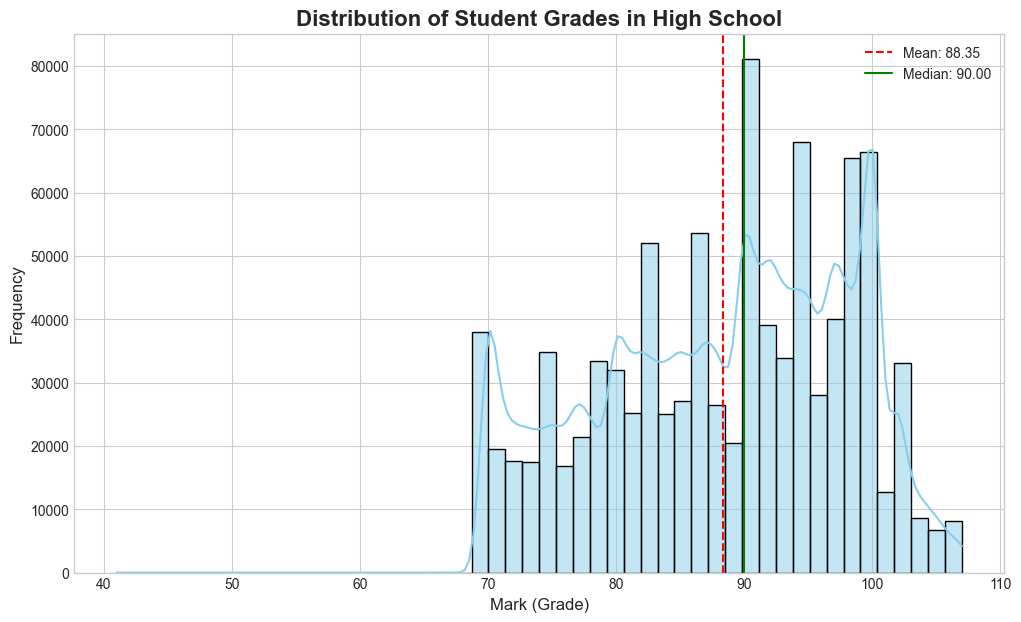

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Student Grade
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

# Convert 'Mark' column to a numeric type. Errors will become NaN.
hs_grades_cleaned['Mark'] = pd.to_numeric(hs_grades_cleaned['Mark'], errors='coerce')

# Filter out nulls and grades of 0, which may skew the plot
grades_to_plot = hs_grades_cleaned[hs_grades_cleaned['Mark'].notna() & (hs_grades_cleaned['Mark'] > 0)]

sns.histplot(grades_to_plot['Mark'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of Student Grades in High School', fontsize=16, fontweight='bold')
plt.xlabel('Mark (Grade)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(grades_to_plot['Mark'].mean(), color='red', linestyle='--', label=f'Mean: {grades_to_plot["Mark"].mean():.2f}')
plt.axvline(grades_to_plot['Mark'].median(), color='green', linestyle='-', label=f'Median: {grades_to_plot["Mark"].median():.2f}')
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_26272\1705665513.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


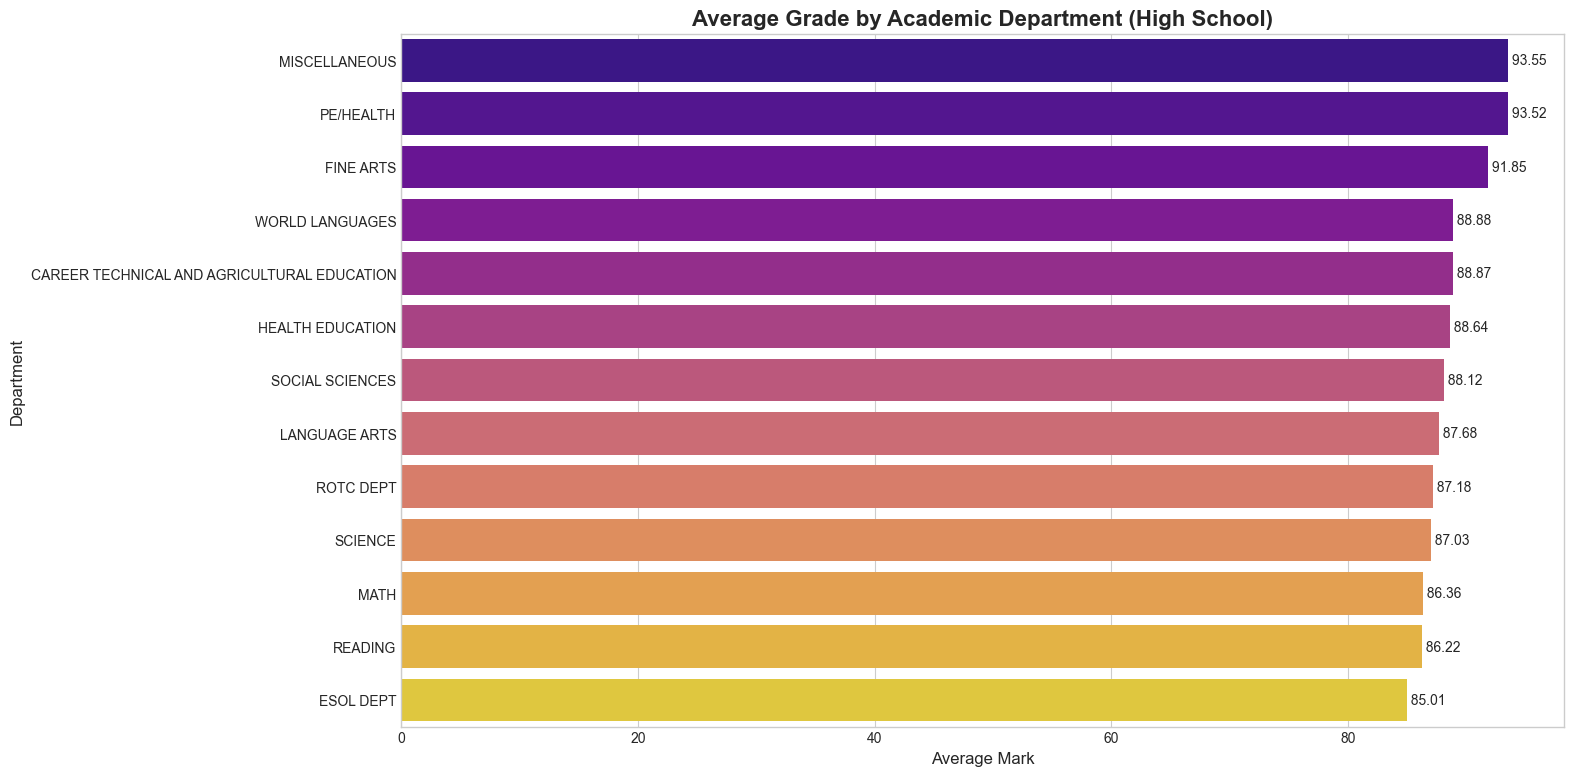

In [68]:
hs_grades_cleaned['Mark'] = pd.to_numeric(hs_grades_cleaned['Mark'], errors='coerce')

# First, merge grades with courses to get Department Descriptions
grades_with_dept = pd.merge(
    hs_grades_cleaned[['student_id', 'CourseNumber', 'Mark']],
    courses_active[['siscourseidentifier', 'DepartmentDesc']],
    left_on='CourseNumber',
    right_on='siscourseidentifier',
    how='inner'
)

# Now that 'Mark' is numeric, this calculation will succeed.
# Drop any rows with NaN in 'Mark' or 'DepartmentDesc' before grouping
grades_with_dept.dropna(subset=['Mark', 'DepartmentDesc'], inplace=True)
avg_grades_by_dept = grades_with_dept.groupby('DepartmentDesc')['Mark'].mean().sort_values(ascending=False).reset_index()

# Plot the results
plt.figure(figsize=(15, 9))
sns.barplot(
    x='Mark',
    y='DepartmentDesc',
    data=avg_grades_by_dept,
    palette='plasma'
)

plt.title('Average Grade by Academic Department (High School)', fontsize=16, fontweight='bold')
plt.xlabel('Average Mark', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xticks(rotation=0)

# Add the value labels on the bars
for index, value in enumerate(avg_grades_by_dept['Mark']):
    plt.text(value, index, f' {value:.2f}', va='center')

plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_26272\489395160.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grades_with_honors['HonorsDesc'].fillna('Standard', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_26272\489395160.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HonorsDesc', y='Mark', data=grades_with_honors, palette='magma')


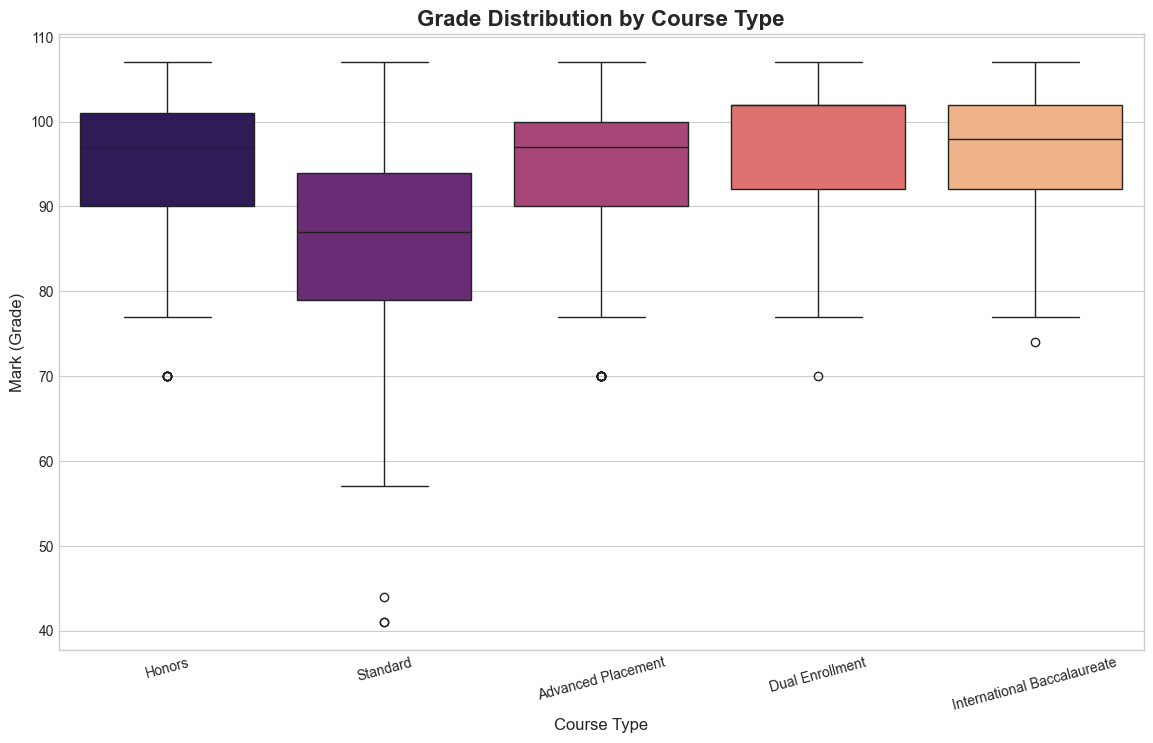

In [69]:
# Ensure the 'Mark' column is numeric
hs_grades_cleaned['Mark'] = pd.to_numeric(hs_grades_cleaned['Mark'], errors='coerce')

# Merge grades with course info to get the 'HonorsDesc'
grades_with_honors = pd.merge(
    hs_grades_cleaned[['CourseNumber', 'Mark']],
    courses_active[['siscourseidentifier', 'HonorsDesc']],
    left_on='CourseNumber',
    right_on='siscourseidentifier',
    how='left'
)

# Fill NaN values in 'HonorsDesc' with 'Standard' to represent regular courses
grades_with_honors['HonorsDesc'].fillna('Standard', inplace=True)
grades_with_honors.dropna(subset=['Mark'], inplace=True)

# Plot the distributions
plt.figure(figsize=(14, 8))
sns.boxplot(x='HonorsDesc', y='Mark', data=grades_with_honors, palette='magma')
plt.title('Grade Distribution by Course Type', fontsize=16, fontweight='bold')
plt.xlabel('Course Type', fontsize=12)
plt.ylabel('Mark (Grade)', fontsize=12)
plt.xticks(rotation=15)
plt.show()

In [70]:
display(courses_active)

,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc,Active_status_clean
1,17.0110400,7799,College Health,HS,HLTH,HEALTH EDUCATION,HEALTH,17.01100,Y,CC,DUAL,Dual Enrollment,0,Level 2 Honors,Y
4,00.0011040,8843,Advisement 10-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
5,00.0010940,8844,Advisement 09-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
6,00.0050140,8845,For Lang Dept Hd,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
7,00.0011140,8846,Advisement 11-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22322,50.0224002,65537,Media Arts IV,HS,FINE,FINE ARTS,NaN,50.02240,Y,CC,NaN,NaN,0,NaN,Y
22326,45.2185001,65542,IB TOK SS Y2,HS,SSSC,SOCIAL SCIENCES,NaN,45.01850,Y,CC,IB,International Baccalaureate,0,NaN,Y
22327,45.2185002,65543,IB TOK SS Y2,HS,SSSC,SOCIAL SCIENCES,NaN,45.01850,Y,CC,IB,International Baccalaureate,0,NaN,Y
22328,45.2660011,65544,IB Economics HLY2,HS,SSSC,SOCIAL SCIENCES,NaN,45.06600,Y,CC,IB,International Baccalaureate,0,NaN,Y


In [ ]:
# Rename the student ID column in graduation summary if necessary
if "mask_studentpersonkey" in grad_summary.columns:
    grad_summary = grad_summary.rename(columns={"mask_studentpersonkey": "student_id"})

# Keep only the columns we need
grad_keep = ["student_id", "SubjectArea", "AreaCreditStillNeeded"]
grad_small = grad_summary[grad_keep].copy()

grad_pivot = grad_small.pivot_table(
    index="student_id",
    columns="SubjectArea",
    values="AreaCreditStillNeeded",
    aggfunc="last"
).fillna(0)

grad_pivot.columns = [f"CredStill_{col}" for col in grad_pivot.columns]
grad_pivot.reset_index(inplace=True)

print(">>> Pivoted GraduationAreaSummary (credits still needed) <<<")
display(grad_pivot.head())

In [ ]:

# Normalize GraduationAreaSummary SubjectArea for matching
subjectarea_map = {
    "Math": "MATH",
    "Health/ PersonalFitness": "HEALTH EDUCATION",
    "World Language/ FineArts/ CareerTech": "CAREER TECHNICAL AND AGRICULTURAL EDUCATION",
    "Social Studies": "SOCIAL SCIENCES",
    "ELA": "LANGUAGE ARTS",
    "Science": "SCIENCE",
    "Electives": "ELECTIVE COURSES"
}

grad_summary["NormalizedSubject"] = grad_summary["SubjectArea"].map(subjectarea_map)

# Use DepartmentDesc for mapping recommendations
credit_gaps = grad_summary[["student_id", "NormalizedSubject", "AreaCreditStillNeeded"]]
credit_gaps = credit_gaps[credit_gaps["AreaCreditStillNeeded"] > 0]
credit_gaps = credit_gaps.rename(columns={"NormalizedSubject": "DepartmentDesc"})

# Filter for active courses only
# active_courses = courses[courses["Active_status"] == "Active"]

# Cleaned course catalog for matching
course_map = courses[["CourseId", "coursename", "DepartmentDesc"]].dropna().drop_duplicates()

# Merge to get recommended courses by subject need
recommendations = credit_gaps.merge(course_map, on="DepartmentDesc", how="left")

In [ ]:
display(recommendations.head())

In [ ]:

recommendations = recommendations[["student_id", "DepartmentDesc", "SubjectArea", "AreaCreditStillNeeded", "CourseId", "coursename"]]

# Display recommendations
print("📘 Normalized Course Recommendations for Students with Credit Gaps")
display(recommendations.head())